<h1 align="center"><a href="https://github.com/sborquez/her2bdl"> Her2BDL</a> - Her2 Bayesian Deep Learning</h1>

<br>
<img src="images/utfsm.png" width="50%"/>

<h2 align="center">Exploratory Data Analysis</h2>

<center>
<i> Notebook created by Sebastián Bórquez G. - <a href="mailto://sebstian.borquez@sansano.usm.cl">sebastian.borquez@sansano.usm.cl</a> - utfsm - May 2021.</i>
</center>


# Setup Notebook


In [1]:
#!export HER2BDL_HOME="/home/sborquez/projects/her2bdl"
#!export HER2BDL_DATASETS="/home/sborquez/projects/her2bdl/datasets"
#!export HER2BDL_EXPERIMENTS="/home/sborquez/projects/her2bdl/experiments"
#!export HER2BDL_EXTRAS="/home/sborquez/projects/her2bdl-files"

In [2]:
## (Option A) Colab Setup
# Connect to your `Google Drive` and install some dependencies.
try:
    raise NotImplementedError
    from google.colab import drive
    colab_ = True
    drive.mount('/content/drive')
    #!pip install git+https://github.com/sborquez/her2bdl\
## (Option B) Local Setup
# Run locally.
except:
    colab_ = False
    
# Adhoc modules
from extra import *

# Her2BDL package
#if is not installed run this line
HER2BDL_HOME=os.environ.get("HER2BDL_HOME")
%cd $HER2BDL_HOME

from her2bdl import *
%matplotlib inline

/home/asuka/projects/her2bdl


# Exploratory Data Analysis

Descripción y exploración del datasets, distribución de clases y ejemplos.


In [3]:
HER2BDL_DATASETS = Path(os.environ.get("HER2BDL_DATASETS")) 
WSI_FOLDER = HER2BDL_DATASETS/ "warwick"

## Warwick Her2 Scoring contest

### Descripción

WSIs are generally high resolution gigapixel images obtained by scanning the conventional glass slides. They are normally stored in pyramid structures containing several levels, each level has a different resolution. For visualization, the region-of-interest (ROI) from these images require specially designed libraries or tools. OpenSlide is one of the commonly used libraries that provides a simple interface to read WSIs.

### Source

- https://warwick.ac.uk/fac/sci/dcs/research/tia/her2contest/download/

- Qaiser, Talha, et al. "Her 2 challenge contest: a detailed assessment of automated her 2 scoring algorithms in whole slide images of breast cancer tissues." Histopathology 72.2 (2018): 227-238.
https://onlinelibrary.wiley.com/doi/epdf/10.1111/his.13333

- T. Qaiser, N.M. Rajpoot, "Learning Where to See: A Novel Attention Model for Automated Immunohistochemical Scoring", in IEEE Transactions on Medical Imaging, 2019. DOI: 10.1109/TMI.2019.2907049
https://ieeexplore.ieee.org/document/8672928


### Warwick Training Dataset

The training dataset consists of 52 WSIs with equally distributed cases for all 4 possible stages of HER2 scoring (0/ 1+/2+/3+).

The ground truth data for WSIs is provided in a spreadsheet containing the case number, HER2 score and percentage cells with complete membrane staining irrespective of intensity respectively.

In [4]:
source = WSI_FOLDER /'train'

train_dataset = get_dataset(source, include_ground_truth=True)
describe_dataset(train_dataset)
train_dataset.sample(5)

Dataset Info:
  size: 51
  columns: Index(['CaseNo', 'HeR2 SCORE', 'source', 'image_her2', 'image_he'], dtype='object')
  by class:
    Score 1: 13
    Score 2: 13
    Score 3: 13
    Score 0: 12


,CaseNo,HeR2 SCORE,source,image_her2,image_he
38,66,0,/home/asuka/projects/her2bdl/scripts/datasets/...,66_HER2.ndpi,66_HE.ndpi
49,87,0,/home/asuka/projects/her2bdl/scripts/datasets/...,87_HER2.ndpi,87_HE.ndpi
36,63,2,/home/asuka/projects/her2bdl/scripts/datasets/...,63_HER2.ndpi,63_HE.ndpi
31,52,0,/home/asuka/projects/her2bdl/scripts/datasets/...,52_HER2.ndpi,52_HE.ndpi
3,9,3,/home/asuka/projects/her2bdl/scripts/datasets/...,09_HER2.ndpi,09_HE.ndpi


### Warwick Testing Dataset 
The testing dataset contains 28 whole-slide-images (WSIs)

In [5]:
source = WSI_FOLDER /'test'

test_dataset = get_dataset(source, include_ground_truth=False)
describe_dataset(test_dataset, include_targets=False)
test_dataset.sample(1)

Dataset Info:
  size: 29
  columns: Index(['source', 'CaseNo', 'image_her2', 'image_he', 'HeR2 SCORE'], dtype='object')


,source,CaseNo,image_her2,image_he,HeR2 SCORE
27,/home/asuka/projects/her2bdl/scripts/datasets/...,75,75_HER2.ndpi,75_HE.ndpi,None


**Warwick Testing Dataset** doesn't have labels

## Training/Evaluation Splits

**Warwick Training Dataset** is divided into train/test 80/20 split using `prepare_dataset.py`.

In [6]:
train = aggregate_dataset(load_dataset(HER2BDL_DATASETS / "train.csv"), replace_dataset_var=False)
test = aggregate_dataset(load_dataset(HER2BDL_DATASETS / "test.csv"), replace_dataset_var=False)

/home/asuka/projects/her2bdl/her2bdl/data/dataset.py:225: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[col] = dataset[col].str.replace(*mapper)
/home/asuka/projects/her2bdl/her2bdl/data/dataset.py:225: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[col] = dataset[col].str.replace(*mapper)


In [7]:
train.sample(3)

,CaseNo,HeR2 SCORE,source,image_her2,image_he,slide_path,segmentation_level,segmentation_width,segmentation_height,selected,...,label,segmentation_path,centroid_row,centroid_col,min_row,min_col,max_row,max_col,sampling_map,sampling_map_level
21,65,1,$HER2BDL_DATASETS/warwick/train,65_HER2.ndpi,65_HE.ndpi,$HER2BDL_DATASETS/warwick/train/65/65_HER2.ndpi,6,768,680,True,...,1,$HER2BDL_DATASETS/segmentation/65.npy,131.864014,258.291285,55.0,168.0,217.0,343.0,$HER2BDL_DATASETS/sampling_maps/65_1.npy,3
0,30,3,$HER2BDL_DATASETS/warwick/train,30_HER2.ndpi,30_HE.ndpi,$HER2BDL_DATASETS/warwick/train/30/30_HER2.ndpi,6,1984,728,True,...,1,$HER2BDL_DATASETS/segmentation/30.npy,235.332798,274.024132,56.0,52.0,427.0,444.0,$HER2BDL_DATASETS/sampling_maps/30_1.npy,3
5,52,0,$HER2BDL_DATASETS/warwick/train,52_HER2.ndpi,52_HE.ndpi,$HER2BDL_DATASETS/warwick/train/52/52_HER2.ndpi,6,1920,704,True,...,1,$HER2BDL_DATASETS/segmentation/52.npy,187.619546,1536.516832,44.0,1429.0,403.0,1716.0,$HER2BDL_DATASETS/sampling_maps/52_1.npy,3


### Class Balance

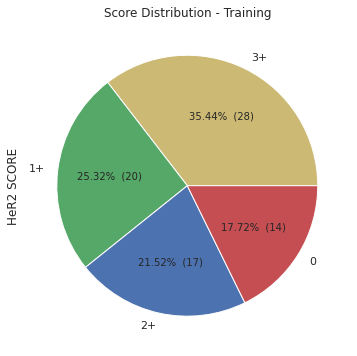

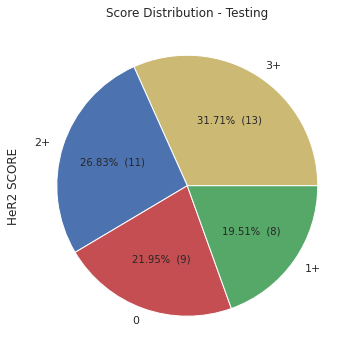

In [8]:
display_class_distribution(train, target=TARGET, target_labels=TARGET_LABELS, dataset_name="Training")
display_class_distribution(test, target=TARGET, target_labels=TARGET_LABELS, dataset_name="Testing")

## CrossValidation Splits

Training set is splitted into K-folds for hyperparameters optimization.

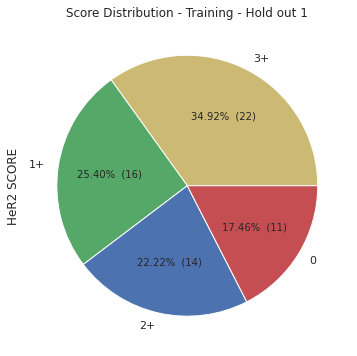

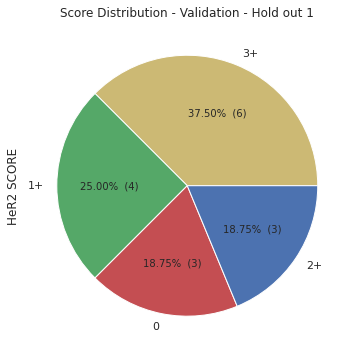

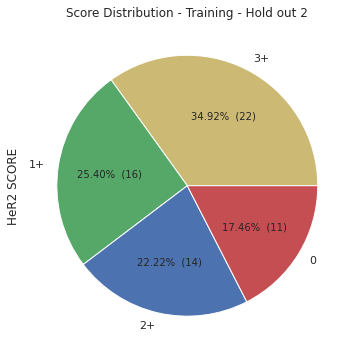

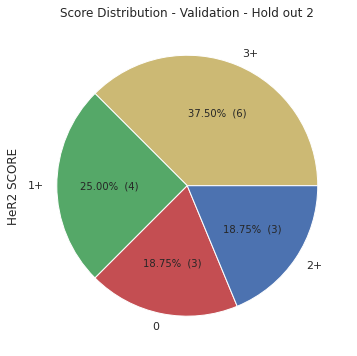

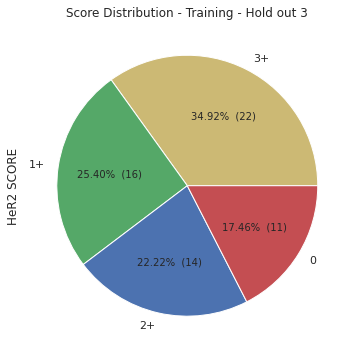

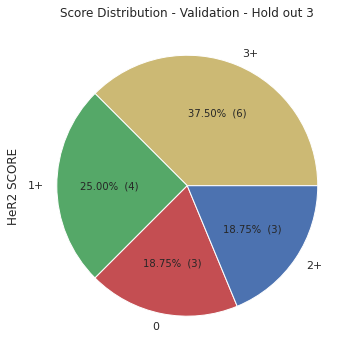

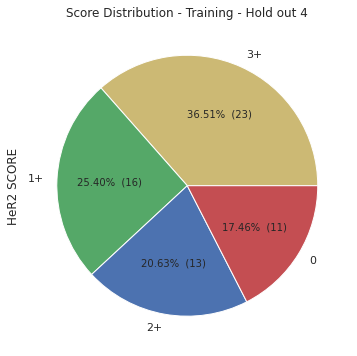

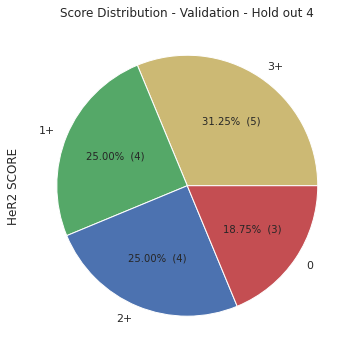

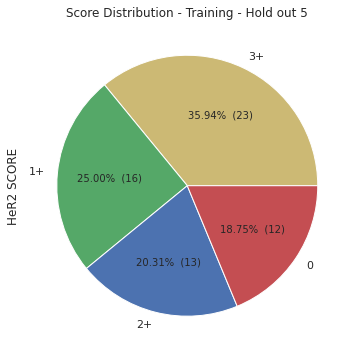

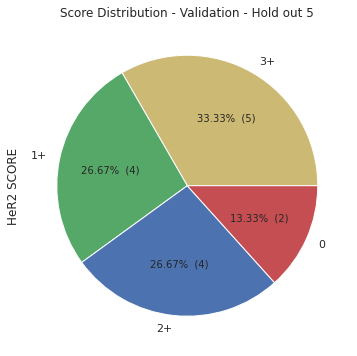

In [9]:
cv_splits = prepare_cv_splits(train, 5, seed=42)
for i, (tr, ts) in enumerate(cv_splits, start=1):
    display_class_distribution(tr, target=TARGET, target_labels=TARGET_LABELS, dataset_name=f"Training - Hold out {i}")
    display_class_distribution(ts, target=TARGET, target_labels=TARGET_LABELS, dataset_name=f"Validation - Hold out {i}")


## Training/Validation for Best parameters

The model with best performance in CV will be retrained with a new split of the training set. The divisiion of training/validation with a distribution 85%/15% it be used for earlystop and identify overfitting.

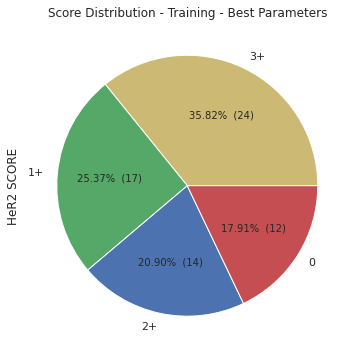

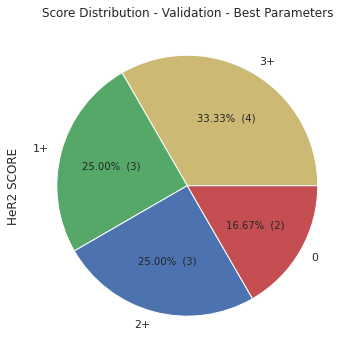

In [10]:
train_2, val_2 = split_dataset(train, validation_ratio=0.15, seed=42)
display_class_distribution(train_2, target=TARGET, target_labels=TARGET_LABELS, dataset_name=f"Training - Best Parameters")
display_class_distribution(val_2, target=TARGET, target_labels=TARGET_LABELS, dataset_name=f"Validation - Best Parameters");
#save_dataset(train_2, output_folder="./train/datasets/best_parameters", dataset_name=f"training")
#save_dataset(val_2, output_folder="./train/datasets/best_parameters", dataset_name=f"validation")

# WSI: Sample images

A whole-slide image is a digital representation of a microscopic slide, typically at a very high level of magnification such as 20x or 40x. As a result of this high magnification, whole slide images are typically very large in size. The maximum file size for a single whole-slide image in our training data set is 3.4 GB, with an average over 1 GB. [[source](https://developer.ibm.com/articles/an-automatic-method-to-identify-tissues-from-big-whole-slide-images-pt1/)]

We can use the [OpenSlide](https://openslide.org/api/python) project to read a variety of whole-slide image formats. This is a pyramidal, tiled format, where the massive slide is composed of a large number of constituent tiles.

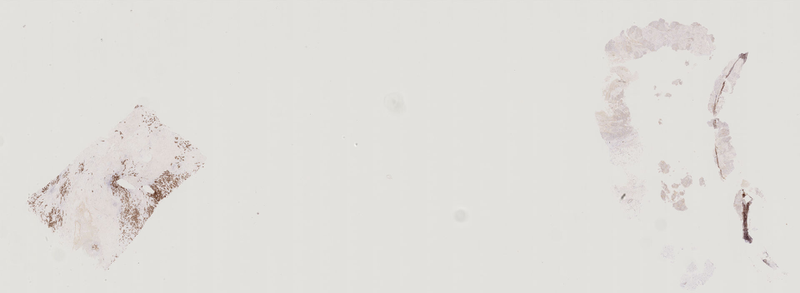

	level [0]: Downsampling 1.0 Size (122880, 45056)
	level [1]: Downsampling 2.0 Size (61440, 22528)
	level [2]: Downsampling 4.0 Size (30720, 11264)
	level [3]: Downsampling 8.0 Size (15360, 5632)
	level [4]: Downsampling 16.0 Size (7680, 2816)
	level [5]: Downsampling 32.0 Size (3840, 1408)
	level [6]: Downsampling 64.0 Size (1920, 704)
	level [7]: Downsampling 128.0 Size (960, 352)
	level [8]: Downsampling 256.0 Size (480, 176)
	level [9]: Downsampling 512.0 Size (240, 88)
	level [10]: Downsampling 1024.0 Size (120, 44)
	level [11]: Downsampling 2048.0 Size (60, 22)


In [11]:
samples = train_dataset.sample(1)
wsi_images = []
thumbnails = []
for _,sample in samples.iterrows():
    slide_path = str(sample["source"]/str(sample["CaseNo"]).zfill(2)/sample["image_her2"])
    her2_wsi = open_slide(slide_path)
    thumbnail = display_WSI_and_metadata(her2_wsi)
    wsi_images.append(her2_wsi)
    thumbnails.append(thumbnail)

## Size distribution

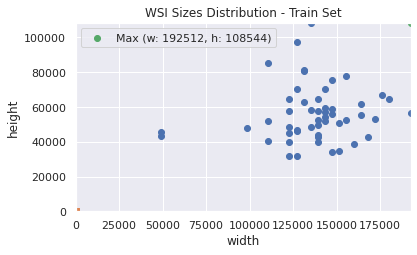

In [12]:
display_wsi_sizes_distribution(train_dataset, "Train Set")

## Otsu

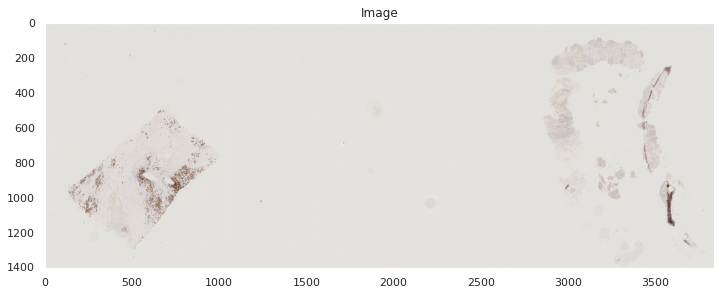

In [13]:
import cv2
size = her2_wsi.level_dimensions[5]
image = cv2.cvtColor(np.array(her2_wsi.get_thumbnail(size)),  cv2.COLOR_RGB2BGR)
plt.figure(figsize=(12, 6))
plt.title("Image")
plt.imshow(image[:,:,::-1], interpolation=None)
plt.grid(False)

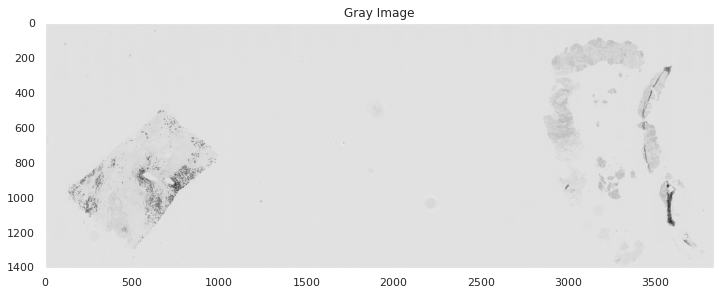

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12, 6))
plt.title("Gray Image")
plt.imshow(gray, interpolation=None, cmap="gray")
plt.grid(False)

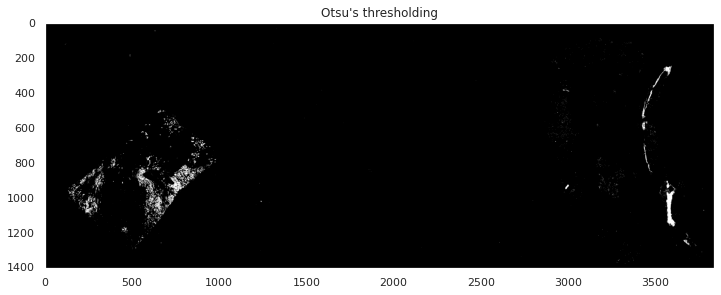

In [15]:
# Otsu's thresholding
ret2,th2 = cv2.threshold(gray,0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(12,6))
plt.title("Otsu's thresholding")
plt.imshow(th2, interpolation=None, cmap="binary")
plt.grid(False)

## OTSU with HSV


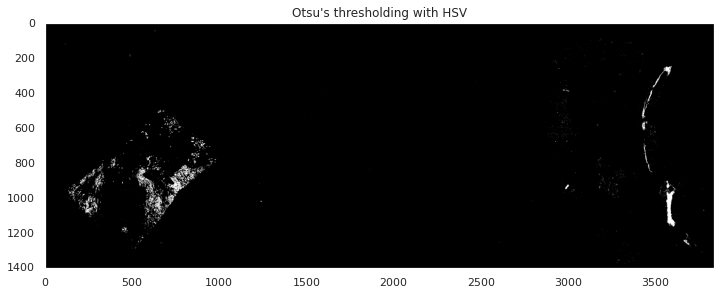

In [16]:
size = her2_wsi.level_dimensions[5]
image = cv2.cvtColor(np.array(her2_wsi.get_thumbnail(size)),  cv2.COLOR_RGB2HSV)

# 
ret2,th2 = cv2.threshold(gray,0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(12,6))
plt.title("Otsu's thresholding with HSV")
plt.imshow(th2, interpolation=None, cmap="binary")
plt.grid(False)

## Dataset Generator

Los generadores se encargan de alimentar a los modelos, generando los patches de imágenes etiquetados durante el entrenamiento.

In [17]:
train = aggregate_dataset(load_dataset(HER2BDL_DATASETS / "train.csv"))
test = aggregate_dataset(load_dataset(HER2BDL_DATASETS / "test.csv"))

/home/asuka/projects/her2bdl/her2bdl/data/dataset.py:225: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[col] = dataset[col].str.replace(*mapper)
/home/asuka/projects/her2bdl/her2bdl/data/dataset.py:225: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[col] = dataset[col].str.replace(*mapper)


### Grid Generator

Extract patches from a grid

100%|██████████| 35/35 [00:04<00:00,  8.65it/s]


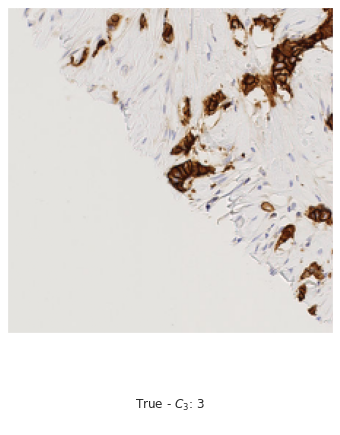

In [18]:
train_generator = GridPatchGenerator(train, 1, 3, (224, 224))
X_batch, y_batch = train_generator[0]
for xi, yi in zip(X_batch, y_batch):
    plot_sample(xi, yi.argmax())
    plt.show()

100%|██████████| 16/16 [00:02<00:00,  6.37it/s]


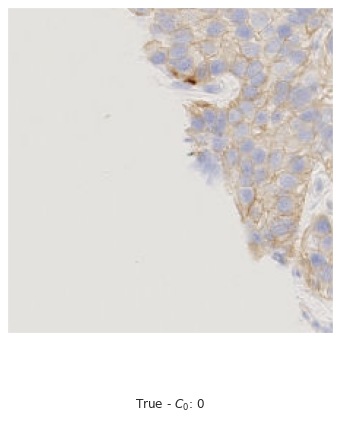

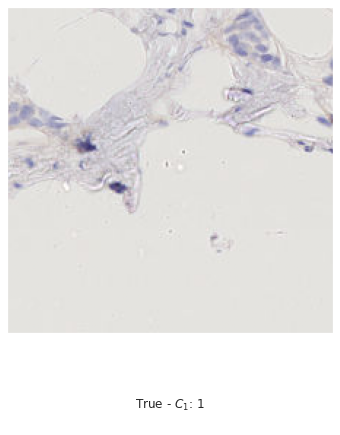

In [19]:
test_generator = GridPatchGenerator(test, 2, 2, (224, 224))
X_batch, y_batch = test_generator[0]
for xi, yi in zip(X_batch, y_batch):
    plot_sample(xi, yi.argmax())
    plt.show()

### MCPatchGenerator

Random patch samples from wsi image 

100%|██████████| 35/35 [00:46<00:00,  1.33s/it]


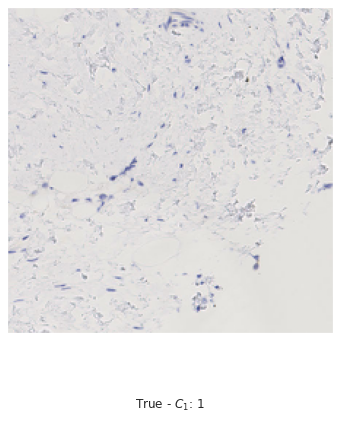

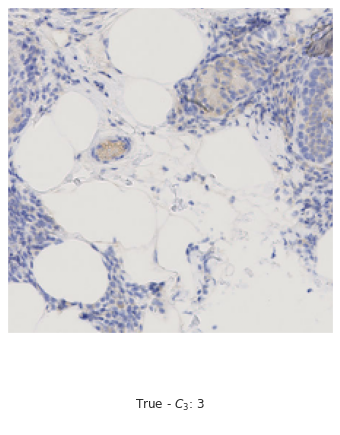

In [20]:
train_generator = MCPatchGenerator(train, 2, 3, (224, 224))
X_batch, y_batch = train_generator[0]
for xi, yi in zip(X_batch, y_batch):
    plot_sample(xi, yi.argmax())
    plt.show()

100%|██████████| 16/16 [00:33<00:00,  2.08s/it]


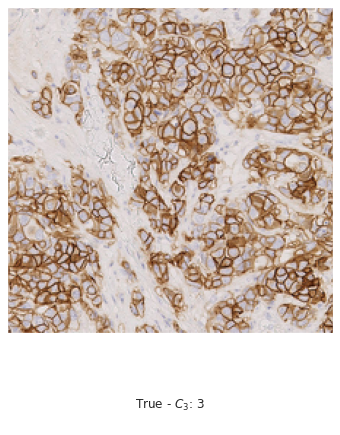

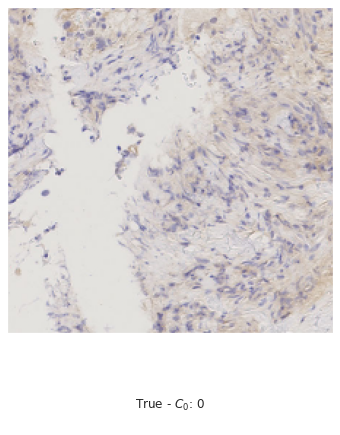

In [21]:
test_generator = MCPatchGenerator(test, 2, 3, (224, 224))
X_batch, y_batch = test_generator[3]
for xi, yi in zip(X_batch, y_batch):
    plot_sample(xi, yi.argmax())
    plt.show()